## This is only a sample EDA
### Appropriately change the final cleaned dataset to fit your implementation 

In [1]:
import numpy as np
import pandas as pd
import os
import sys

In [2]:
trip = pd.read_csv('dataset/trip.csv')
weather = pd.read_csv('dataset/weather.csv')


In [3]:
station =  pd.read_csv('dataset/station.csv')

In [4]:
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [5]:
def extract_year(data, col):
    # Extract the data in 2014
    date = pd.to_datetime(data[col])
    data[col] = date
    return data[(date < pd.to_datetime("20150101")) & (date >= pd.to_datetime("20140101"))].reset_index(drop = True)

In [6]:
trip = extract_year(trip, "end_date")
trip = extract_year(trip, "start_date")
weather = extract_year(weather, "date")

In [7]:
with open("dataset/all_sf_zip.txt", "r") as file:
    lines = file.readlines()[0].strip(".")
    all_zip = lines.split(", ")

In [8]:
# Extract San Francisco Data
trip = trip[trip["zip_code"].apply(lambda x: x in all_zip)]
weather = weather[weather["zip_code"] == 94107]
station = station[station["city"] == "San Francisco"]

In [9]:
# Extract Only Useful Columns
weather = weather[['date', 'max_temperature_f','mean_temperature_f','min_temperature_f','zip_code']]

In [17]:
trip["start_date"].dt.time

1         00:14:00
2         00:17:00
5         00:24:00
7         00:25:00
10        00:28:00
            ...   
326328    07:32:00
326330    06:58:00
326331    05:54:00
326332    04:59:00
326333    04:21:00
Name: start_date, Length: 149070, dtype: object

In [28]:
def split_time_info(df, *cols):
    data = df.copy()
    for i in cols:
        date = data[i]
        time = date.dt.time
        data[i] = pd.to_datetime(date.dt.date)
        data[i + "_time"] = time
    return data

In [29]:
split_time_trip = split_time_info(trip, "start_date", "end_date")

In [30]:
split_time_trip

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_date_time,end_date_time
1,139546,432,2014-01-01,San Francisco City Hall,58,2014-01-01,Townsend at 7th,65,395,Subscriber,94107,00:14:00,00:21:00
2,139547,1523,2014-01-01,Embarcadero at Sansome,60,2014-01-01,Beale at Market,56,331,Subscriber,94112,00:17:00,00:42:00
5,139551,779,2014-01-01,Steuart at Market,74,2014-01-01,Washington at Kearney,46,335,Customer,94109,00:24:00,00:37:00
7,139553,721,2014-01-01,Steuart at Market,74,2014-01-01,Washington at Kearney,46,563,Customer,94109,00:25:00,00:37:00
10,139558,1600,2014-01-01,Harry Bridges Plaza (Ferry Building),50,2014-01-01,Steuart at Market,74,413,Subscriber,94102,00:28:00,00:54:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
326328,432964,169,2014-09-01,Embarcadero at Bryant,54,2014-09-01,Embarcadero at Folsom,51,496,Subscriber,94105,07:32:00,07:35:00
326330,432959,441,2014-09-01,Market at 10th,67,2014-09-01,Market at Sansome,77,617,Subscriber,94132,06:58:00,07:05:00
326331,432957,398,2014-09-01,Yerba Buena Center of the Arts (3rd @ Howard),68,2014-09-01,Steuart at Market,74,561,Subscriber,94112,05:54:00,06:00:00
326332,432952,240,2014-09-01,South Van Ness at Market,66,2014-09-01,Civic Center BART (7th at Market),72,292,Subscriber,94102,04:59:00,05:03:00


In [31]:
merged_trip = pd.merge(split_time_trip, weather, left_on="start_date", right_on = "date").drop(columns=['date', "zip_code_y"]).reset_index(drop=True)

In [33]:
merged_trip.to_csv('dataset/data_cleaned.csv')

In [13]:
#pd.read_csv('data.csv', index_col=[0]).head()

In [36]:
merged_trip.columns

Index(['id', 'duration', 'start_date', 'start_station_name',
       'start_station_id', 'end_date', 'end_station_name', 'end_station_id',
       'bike_id', 'subscription_type', 'zip_code_x', 'start_date_time',
       'end_date_time', 'max_temperature_f', 'mean_temperature_f',
       'min_temperature_f'],
      dtype='object')

In [43]:
trip["duration"].max()

716480

In [44]:
for_vis = merged_trip[merged_trip["duration"] < 5000]

<AxesSubplot:xlabel='mean_temperature_f', ylabel='duration'>

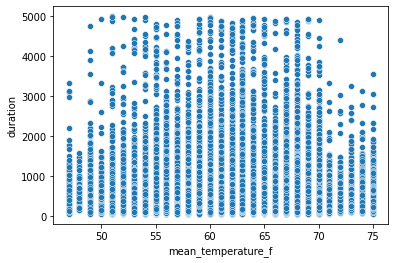

In [47]:
import seaborn as sns
sns.scatterplot(y = "duration", x = "mean_temperature_f", data=for_vis)

In [48]:
merged_trip

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code_x,start_date_time,end_date_time,max_temperature_f,mean_temperature_f,min_temperature_f
0,139546,432,2014-01-01,San Francisco City Hall,58,2014-01-01,Townsend at 7th,65,395,Subscriber,94107,00:14:00,00:21:00,56.0,49.0,41.0
1,139547,1523,2014-01-01,Embarcadero at Sansome,60,2014-01-01,Beale at Market,56,331,Subscriber,94112,00:17:00,00:42:00,56.0,49.0,41.0
2,139551,779,2014-01-01,Steuart at Market,74,2014-01-01,Washington at Kearney,46,335,Customer,94109,00:24:00,00:37:00,56.0,49.0,41.0
3,139553,721,2014-01-01,Steuart at Market,74,2014-01-01,Washington at Kearney,46,563,Customer,94109,00:25:00,00:37:00,56.0,49.0,41.0
4,139558,1600,2014-01-01,Harry Bridges Plaza (Ferry Building),50,2014-01-01,Steuart at Market,74,413,Subscriber,94102,00:28:00,00:54:00,56.0,49.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149065,432964,169,2014-09-01,Embarcadero at Bryant,54,2014-09-01,Embarcadero at Folsom,51,496,Subscriber,94105,07:32:00,07:35:00,83.0,70.0,57.0
149066,432959,441,2014-09-01,Market at 10th,67,2014-09-01,Market at Sansome,77,617,Subscriber,94132,06:58:00,07:05:00,83.0,70.0,57.0
149067,432957,398,2014-09-01,Yerba Buena Center of the Arts (3rd @ Howard),68,2014-09-01,Steuart at Market,74,561,Subscriber,94112,05:54:00,06:00:00,83.0,70.0,57.0
149068,432952,240,2014-09-01,South Van Ness at Market,66,2014-09-01,Civic Center BART (7th at Market),72,292,Subscriber,94102,04:59:00,05:03:00,83.0,70.0,57.0
